# Introduction

The goal of this notebook is to provide a simple way to create a submission file for The [Uber Nairobi Ambulance Perambulation Challenge](https://zindi.africa/competitions/uber-nairobi-ambulance-perambulation-challenge). we will go into my simple first solution and create a submission file.

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.cluster import KMeans

In [41]:
# Load the data
df = pd.read_csv('Train.csv',parse_dates=['datetime'])
print(df.shape)
df.head()

(6318, 4)


,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382


your solution and the way that you approch the challenge may be different than the method used in this notebook.<br>
I think that there are 2 main aproches to create the submission file, the first one is to create a model that ignores the date time features and the second solution is creating a model that takes in condcedaration the datetime feature

this is why I chose to create 2 different submission files

1) [first model : k-means ignoring time](#first-model-:-k-means-ignoring-time)<br><br>
2) [second model : K-means with 3 hours time split clustring](/#second-model-:-K-means-with-3-hours-time-split-clustring)<br><br>


## first model : k-means ignoring time

Now we are finding the 6 virtual ambulances locations  by grouping over the crashes locations in to 6 groups.<br>
we are using a popular and easy to understand algorithm called KMeans  to group over the craches places.<br>
in this first part we will <b>ignore</b> the time feature in this first part this means we will predict a <b>fixed</b> places for the 6 ambulances.

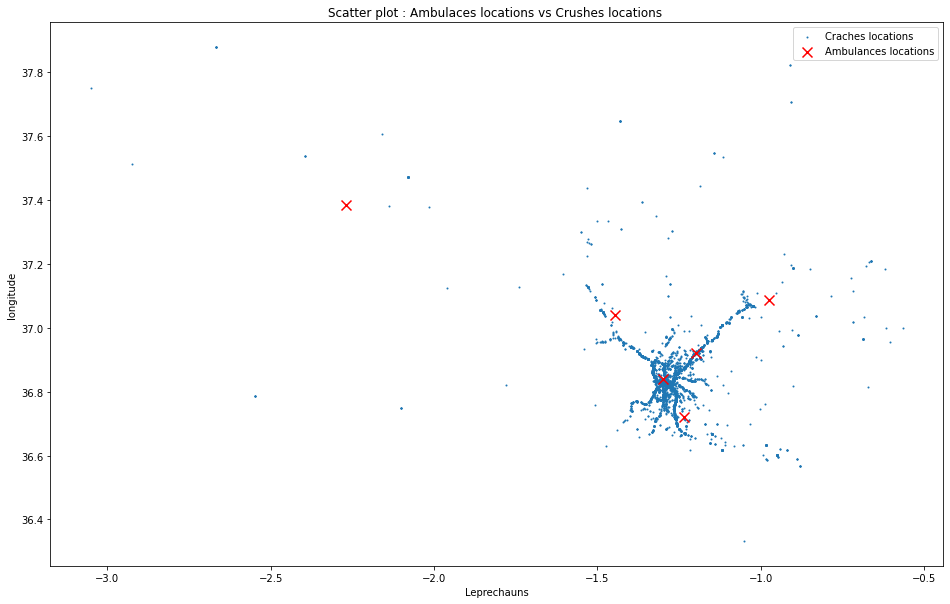

In [42]:
kmeans_global = KMeans(n_clusters=6, random_state=500).fit(df[['latitude','longitude']])

fig, axs = plt.subplots(figsize=(16, 10))

plt.scatter(x = df['latitude'],y=df['longitude'], s=1, label='Craches locations' )
plt.scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x",
            color='r',label='Ambulances locations',s=100)
axs.set_title('Scatter plot : Ambulaces locations vs Crushes locations ')
plt.xlabel("Leprechauns")
plt.ylabel("longitude")
plt.legend()
plt.show()

### preparing submission file

In [43]:
# View the submission format
ss = pd.read_csv('SampleSubmission.csv', parse_dates=['date'])
ss.head()

,date,A0_Latitude,A0_Longitude,A1_Latitude,A1_Longitude,A2_Latitude,A2_Longitude,A3_Latitude,A3_Longitude,A4_Latitude,A4_Longitude,A5_Latitude,A5_Longitude
0,2019-07-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-07-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-07-01 06:00:00,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-07-01 09:00:00,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-07-01 12:00:00,0,0,0,0,0,0,0,0,0,0,0,0


bellow I printed the cluster centers, we see that it has 2 columns (the first one is latitude and the second one is longitude).

In [44]:
kmeans_global.cluster_centers_

array([[-1.19904008, 36.92206058],
       [-1.23330826, 36.72098959],
       [-1.44752882, 37.0401509 ],
       [-2.26993277, 37.38589229],
       [-0.97528982, 37.08723472],
       [-1.29833511, 36.84037758]])

we need to flaten them to be in a format similar to the submission file.

In [45]:
def flaten(centers_list):
    """flatening the list of tuples [(x0,y0),(x1,y1),(x2,y2),(x3,y3)] to [x0,y0,x1,y1,x2,y2,x3,y3]"""
    merged = list(zip(centers_list[:,0],centers_list[:,1]))
    return [c for couple in merged for c in couple ]

so let's test our function

In [46]:
flaten(kmeans_global.cluster_centers_)

[-1.199040081285851,
 36.92206057910207,
 -1.2333082631941068,
 36.720989587484006,
 -1.4475288214910813,
 37.0401509016037,
 -2.26993277069289,
 37.385892286852695,
 -0.9752898218641668,
 37.08723471856972,
 -1.2983351100673866,
 36.84037758205396]

so it is working fine<br>
great :D<br>
let's build our submission file now 

In [47]:
t = flaten(kmeans_global.cluster_centers_)

#now we are going to build new dataframe for the submission
d = pd.DataFrame([])
d['date'] = ss['date'] 
for i in range(len(t)):
    d[ss.keys()[i+1]] = t[i] #i+1 cause the first column is date
d.head()

,date,A0_Latitude,A0_Longitude,A1_Latitude,A1_Longitude,A2_Latitude,A2_Longitude,A3_Latitude,A3_Longitude,A4_Latitude,A4_Longitude,A5_Latitude,A5_Longitude
0,2019-07-01 00:00:00,-1.19904,36.922061,-1.233308,36.72099,-1.447529,37.040151,-2.269933,37.385892,-0.97529,37.087235,-1.298335,36.840378
1,2019-07-01 03:00:00,-1.19904,36.922061,-1.233308,36.72099,-1.447529,37.040151,-2.269933,37.385892,-0.97529,37.087235,-1.298335,36.840378
2,2019-07-01 06:00:00,-1.19904,36.922061,-1.233308,36.72099,-1.447529,37.040151,-2.269933,37.385892,-0.97529,37.087235,-1.298335,36.840378
3,2019-07-01 09:00:00,-1.19904,36.922061,-1.233308,36.72099,-1.447529,37.040151,-2.269933,37.385892,-0.97529,37.087235,-1.298335,36.840378
4,2019-07-01 12:00:00,-1.19904,36.922061,-1.233308,36.72099,-1.447529,37.040151,-2.269933,37.385892,-0.97529,37.087235,-1.298335,36.840378


as mentioned before we ignored the date and time features. this is why our lines are the same for all the times as mentioned in the table<br>

In [11]:
d.to_csv('kmeans.csv')

## second model : K-means with 3 hours time split clustring

in this first part we will <b>ignore</b> the time feature in this first part this means we will predict a <b>fixed</b> places for the 6 ambulances.

in the cell bellow I looped over this list [0,3,6,9,12,15,18,21] to split the training dataset into 8 chunks based on the hours of the cruches (I mean I grouped the cruches between 00.00 to 02.59 and from 03.00 to 05.95 ....) and create separate data sets then create seperated models based on those datasets.<br>
then we used our older function to flaten the results and to create the submission file.

In [49]:
#modeling flatening the results and preparing submission file
for i in range(0,22,3):
    d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
    kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
    t = flaten(kmeans.cluster_centers_)
    ss.loc[ss['date'].dt.hour == i, ['A0_Latitude','A0_Longitude',
                                     'A1_Latitude','A1_Longitude','A2_Latitude','A2_Longitude',
                                     'A3_Latitude','A3_Longitude','A4_Latitude','A4_Longitude',
                                     'A5_Latitude','A5_Longitude']] = t
    

In [50]:
ss.head()

,date,A0_Latitude,A0_Longitude,A1_Latitude,A1_Longitude,A2_Latitude,A2_Longitude,A3_Latitude,A3_Longitude,A4_Latitude,A4_Longitude,A5_Latitude,A5_Longitude
0,2019-07-01 00:00:00,-1.196050,36.923447,-2.497671,37.788891,-1.302300,36.843153,-0.912302,37.067283,-1.251698,36.725445,-1.457051,37.124484
1,2019-07-01 03:00:00,-0.996639,37.044251,-1.318341,36.846015,-2.549553,37.629724,-1.247231,36.735731,-1.520020,37.156328,-1.225661,36.887187
2,2019-07-01 06:00:00,-1.249694,36.731878,-1.305988,36.838856,-2.272487,37.384144,-1.053195,37.103977,-1.220844,36.892566,-1.450653,37.028129
3,2019-07-01 09:00:00,-1.277225,36.868569,-1.026252,36.620439,-2.282399,37.312977,-1.053138,37.028036,-1.456808,37.029627,-1.280201,36.762681
4,2019-07-01 12:00:00,-1.282357,36.823803,-1.141989,36.976817,-1.388426,36.957753,-0.816886,37.182421,-1.941905,37.501344,-1.007614,36.618763


In [51]:
ss.to_csv('kmeans_by time')

## Comparing first and second model

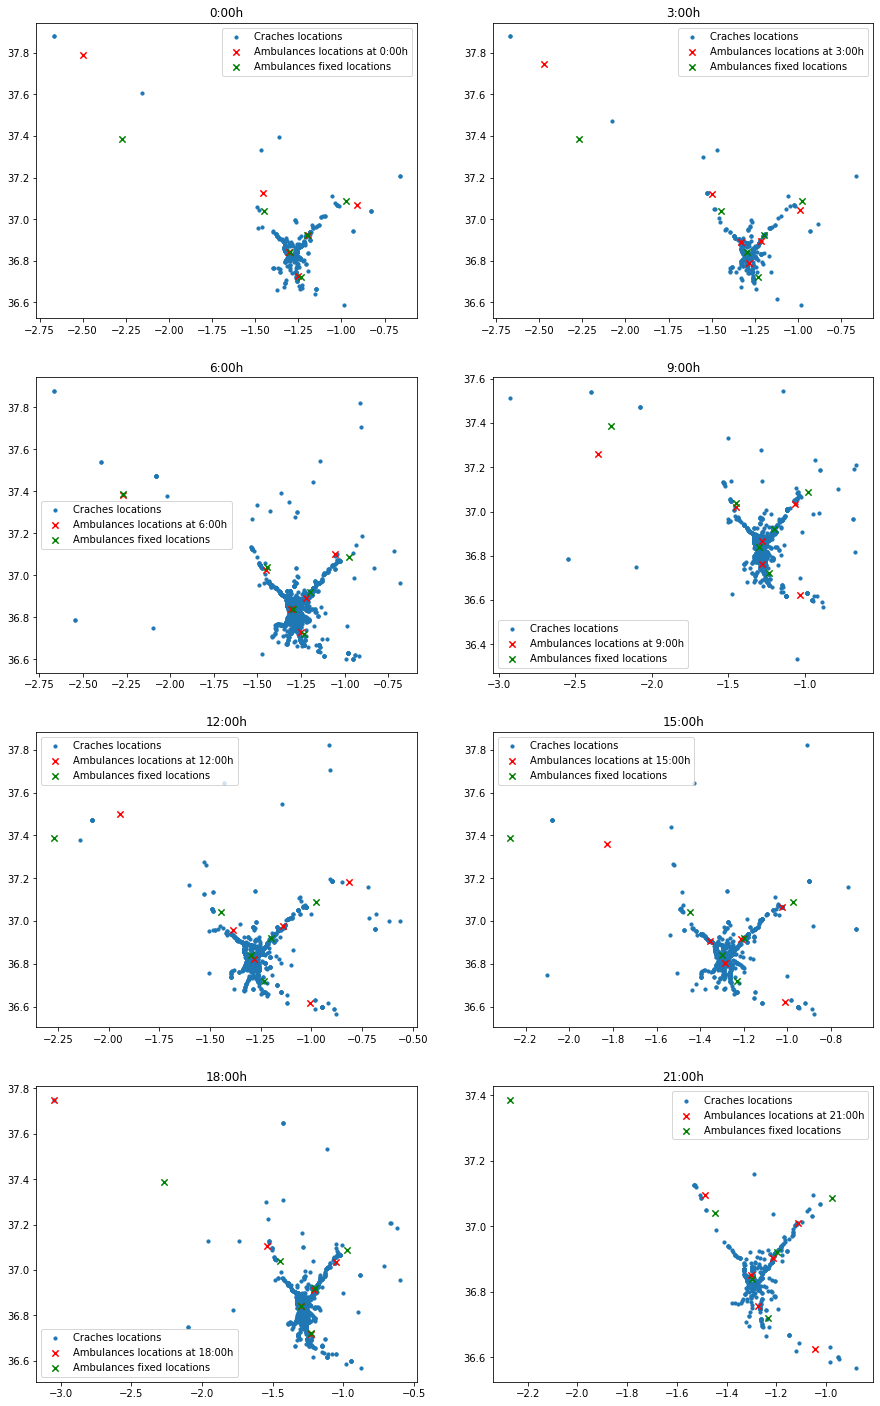

In [62]:

fig, axs = plt.subplots(4, 2,figsize=(15, 25))
models = []
i= 0
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[0, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[0, 0].set_title(str(i)+':00h')
axs[0, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[0, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[0, 0].legend()
#########################################################

i= 3
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[0, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[0, 1].set_title(str(i)+':00h')
axs[0, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[0, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[0, 1].legend()
########################################################


i=6
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[1, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[1, 0].set_title(str(i)+':00h')
axs[1, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[1, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[1, 0].legend()
#########################################################

i= 9
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[1, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[1, 1].set_title(str(i)+':00h')
axs[1, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[1, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[1, 1].legend()
########################################################


i= 12
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[2, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[2, 0].set_title(str(i)+':00h')
axs[2, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[2, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[2, 0].legend()
########################################################

i= 15
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[2, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[2, 1].set_title(str(i)+':00h')
axs[2, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[2, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[2, 1].legend()
########################################################


i= 18
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[3, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[3, 0].set_title(str(i)+':00h')
axs[3, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[3, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[3, 0].legend()
########################################################

i= 21
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[3, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[3, 1].set_title(str(i)+':00h')
axs[3, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[3, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[3, 1].legend()
########################################################


In [63]:
for j,k in enumerate(models):
    print("from",j*3,"to",(j*3)+3)
    for i in range(6):
        print("center",i,(k.cluster_centers_[i,0],k.cluster_centers_[i,1])," :",np.sum(k.labels_== i))
    print("##################################")

from 0 to 3
center 0 (-1.1960499426633322, 36.92344668719446)  : 88
center 1 (-2.49767067091915, 37.788890601409804)  : 3
center 2 (-1.3022998319421966, 36.84315260437484)  : 229
center 3 (-0.9123015427482563, 37.06728259602676)  : 13
center 4 (-1.2516983122192369, 36.72544484576621)  : 50
center 5 (-1.4570508903352384, 37.124483665810565)  : 6
##################################
from 3 to 6
center 0 (-1.2833838590821474, 36.790851046430575)  : 161
center 1 (-2.471671704418653, 37.743999601459834)  : 3
center 2 (-1.2166835171544235, 36.89638975005588)  : 63
center 3 (-1.3301847666685624, 36.888956920601096)  : 90
center 4 (-1.5010727118980631, 37.12321614743279)  : 10
center 5 (-0.9907558001414796, 37.045630826700574)  : 13
##################################
from 6 to 9
center 0 (-1.220844459219474, 36.89256578031258)  : 501
center 1 (-2.27248665567963, 37.38414414470723)  : 14
center 2 (-1.2496940519123423, 36.73187769661907)  : 478
center 3 (-1.0531951866363376, 37.10397686608)  : 55


In [ ]:
p